In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Create the Dataframe and clean it based on the guidelines of EDA notebook

In [2]:
df_metadata = pd.read_csv('/kaggle/input/isic-2024-challenge/train-metadata.csv')
df_metadata.head(5)

/tmp/ipykernel_18/2377214977.py:1: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df_metadata = pd.read_csv('/kaggle/input/isic-2024-challenge/train-metadata.csv')


,isic_id,target,patient_id,age_approx,sex,anatom_site_general,clin_size_long_diam_mm,image_type,tbp_tile_type,tbp_lv_A,...,lesion_id,iddx_full,iddx_1,iddx_2,iddx_3,iddx_4,iddx_5,mel_mitotic_index,mel_thick_mm,tbp_lv_dnn_lesion_confidence
0,ISIC_0015670,0,IP_1235828,60.0,male,lower extremity,3.04,TBP tile: close-up,3D: white,20.244422,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,97.517282
1,ISIC_0015845,0,IP_8170065,60.0,male,head/neck,1.10,TBP tile: close-up,3D: white,31.712570,...,IL_6727506,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,3.141455
2,ISIC_0015864,0,IP_6724798,60.0,male,posterior torso,3.40,TBP tile: close-up,3D: XP,22.575830,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.804040
3,ISIC_0015902,0,IP_4111386,65.0,male,anterior torso,3.22,TBP tile: close-up,3D: XP,14.242329,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.989998
4,ISIC_0024200,0,IP_8313778,55.0,male,anterior torso,2.73,TBP tile: close-up,3D: white,24.725520,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,70.442510


In [3]:
new_column_names = {
    'isic_id': 'Unique_case_identifier',
    'target': 'Target',
    'age_approx': 'Approximate_age',
    'sex': 'Patient_sex',
    'anatom_site_general': 'General_anatomical_site',
    'clin_size_long_diam_mm': 'Longest_diameter_mm',
    'image_type': 'Image_type',
    'tbp_tile_type': 'Lighting_modality_3D_TBP',
    'tbp_lv_A': 'A_inside_lesion',
    'tbp_lv_Aext': 'A_outside_lesion',
    'tbp_lv_B': 'B_inside_lesion',
    'tbp_lv_Bext': 'B_outside_lesion',
    'tbp_lv_C': 'C_inside_lesion',
    'tbp_lv_Cext': 'C_outside_lesion',
    'tbp_lv_H': 'Hue_inside_lesion',
    'tbp_lv_Hext': 'Hue_outside_lesion',
    'tbp_lv_L': 'L_inside_lesion',
    'tbp_lv_Lext': 'L_outside_lesion',
    'tbp_lv_areaMM2': 'Lesion_area_mm2',
    'tbp_lv_area_perim_ratio': 'Border_jaggedness_ratio',
    'tbp_lv_color_std_mean': 'Color_irregularity_mean',
    'tbp_lv_deltaA': 'Average_A_contrast',
    'tbp_lv_deltaB': 'Average_B_contrast',
    'tbp_lv_deltaL': 'Average_L_contrast',
    'tbp_lv_deltaLB': 'Average_delta_LB',
    'tbp_lv_deltaLBnorm': 'Contrast_lesion_surrounding_skin',
    'tbp_lv_eccentricity': 'Lesion_eccentricity',
    'tbp_lv_location': 'Anatomical_location',
    'tbp_lv_location_simple': 'Simple_anatomical_location',
    'tbp_lv_minorAxisMM': 'Smallest_diameter_mm',
    'tbp_lv_nevi_confidence': 'Nevus_confidence_score',
    'tbp_lv_norm_border': 'Border_irregularity_normalized',
    'tbp_lv_norm_color': 'Color_variation_normalized',
    'tbp_lv_perimeterMM': 'Lesion_perimeter_mm',
    'tbp_lv_radial_color_std_max': 'Color_asymmetry',
    'tbp_lv_stdL': 'Standard_deviation_L_inside',
    'tbp_lv_Lext': 'Standard_deviation_L_outside',
    'tbp_lv_symm_2axis': 'Border_asymmetry',
    'tbp_lv_symm_2axis_angle': 'Border_asymmetry_angle',
    'tbp_lv_x': 'Lesion_X_coordinate',
    'tbp_lv_y': 'Lesion_Y_coordinate',
    'tbp_lv_z': 'Lesion_Z_coordinate',
    'attribution': 'Image_attribution',
    'license': 'Image_license',
    'lesion_id': 'Unique_lesion_identifier',
    'iddx_full': 'Full_diagnosis_code',
    'iddx_1': 'Primary_diagnosis_category',
    'iddx_2': 'Secondary_diagnosis_category',
    'iddx_3': 'Tertiary_diagnosis_category',
    'iddx_4': 'Quaternary_diagnosis_category',
    'iddx_5': 'Quinary_diagnosis_category',
    'mel_mitotic_index': 'Melanoma_mitotic_index',
    'mel_thick_mm': 'Melanoma_thickness_mm',
    'tbp_lv_dnn_lesion_confidence': 'DNN_lesion_confidence_score'
}

df_metadata.rename(columns=new_column_names, inplace=True)

In [4]:
#Delate columns with no information
df_limp_columns = df_metadata.drop(columns=["Unique_lesion_identifier","Secondary_diagnosis_category","Tertiary_diagnosis_category","Quaternary_diagnosis_category","Quinary_diagnosis_category","Melanoma_mitotic_index","Melanoma_thickness_mm"])

#Deleate useless columns
df_limp = df_limp_columns.drop(columns=["copyright_license","Image_attribution","Image_type", "Lighting_modality_3D_TBP","Anatomical_location","Simple_anatomical_location"])


#Clear registers with null values in the columns that contain less than 10%
columns_to_check = ["Approximate_age","Patient_sex","General_anatomical_site"]
df_clean = df_limp.dropna(subset=columns_to_check)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 381914 entries, 0 to 401058
Data columns (total 42 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Unique_case_identifier            381914 non-null  object 
 1   Target                            381914 non-null  int64  
 2   patient_id                        381914 non-null  object 
 3   Approximate_age                   381914 non-null  float64
 4   Patient_sex                       381914 non-null  object 
 5   General_anatomical_site           381914 non-null  object 
 6   Longest_diameter_mm               381914 non-null  float64
 7   A_inside_lesion                   381914 non-null  float64
 8   A_outside_lesion                  381914 non-null  float64
 9   B_inside_lesion                   381914 non-null  float64
 10  B_outside_lesion                  381914 non-null  float64
 11  C_inside_lesion                   381914 non-null  float6

# Transform variables (Object -> Float64)

In [5]:
#We should drop any unique identifier
df_clean = df_clean.drop(columns= ["patient_id","Unique_case_identifier"])

## Object to Float64 (One Hot Encoding)

In [6]:
#First we need to find how many unique categories are per Object Column
categorical_columns = df_clean.select_dtypes(include=['object', 'category']).columns

for col in categorical_columns:
    unique_categories = df_clean[col].unique()
    num_unique_categories = len(unique_categories)
    print(f"Column: {col}")
    print(f"Unique Categories: {unique_categories}")
    print(f"Number of Unique Categories: {num_unique_categories}")
    print("\n")

Column: Patient_sex
Unique Categories: ['male' 'female']
Number of Unique Categories: 2


Column: General_anatomical_site
Unique Categories: ['lower extremity' 'head/neck' 'posterior torso' 'anterior torso'
 'upper extremity']
Number of Unique Categories: 5


Column: Full_diagnosis_code
Unique Categories: ['Benign'
 'Benign::Benign epidermal proliferations::Lichen planus like keratosis'
 'Benign::Benign melanocytic proliferations::Nevus::Nevus, NOS, Junctional'
 'Malignant::Malignant epidermal proliferations::Squamous cell carcinoma in situ'
 'Benign::Benign melanocytic proliferations::Nevus'
 'Malignant::Malignant adnexal epithelial proliferations - Follicular::Basal cell carcinoma::Basal cell carcinoma, Nodular'
 'Malignant::Malignant epidermal proliferations::Squamous cell carcinoma, Invasive'
 'Indeterminate::Indeterminate epidermal proliferations::Solar or actinic keratosis'
 'Benign::Benign epidermal proliferations::Seborrheic keratosis'
 'Benign::Benign melanocytic proliferation

**Given that the column 'Full diagnosis code' has a lot of unique categories and is redundant with the column 'Primary_diagnosis_category', we decieded to drop it**

In [7]:
df_clean = df_clean.drop(columns= ["Full_diagnosis_code"])

categorical_columns = df_clean.select_dtypes(include=['object', 'category']).columns

for col in categorical_columns:
    unique_categories = df_clean[col].unique()
    num_unique_categories = len(unique_categories)
    print(f"Column: {col}")
    print(f"Unique Categories: {unique_categories}")
    print(f"Number of Unique Categories: {num_unique_categories}")
    print("\n")

Column: Patient_sex
Unique Categories: ['male' 'female']
Number of Unique Categories: 2


Column: General_anatomical_site
Unique Categories: ['lower extremity' 'head/neck' 'posterior torso' 'anterior torso'
 'upper extremity']
Number of Unique Categories: 5


Column: Primary_diagnosis_category
Unique Categories: ['Benign' 'Malignant' 'Indeterminate']
Number of Unique Categories: 3




In [8]:
#Encode each variable
df_encoded = pd.get_dummies(df_clean, columns=['Patient_sex','General_anatomical_site','Primary_diagnosis_category'], prefix='Cat')
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 381914 entries, 0 to 401058
Data columns (total 46 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Target                            381914 non-null  int64  
 1   Approximate_age                   381914 non-null  float64
 2   Longest_diameter_mm               381914 non-null  float64
 3   A_inside_lesion                   381914 non-null  float64
 4   A_outside_lesion                  381914 non-null  float64
 5   B_inside_lesion                   381914 non-null  float64
 6   B_outside_lesion                  381914 non-null  float64
 7   C_inside_lesion                   381914 non-null  float64
 8   C_outside_lesion                  381914 non-null  float64
 9   Hue_inside_lesion                 381914 non-null  float64
 10  Hue_outside_lesion                381914 non-null  float64
 11  L_inside_lesion                   381914 non-null  float6

# Correlation Matrix

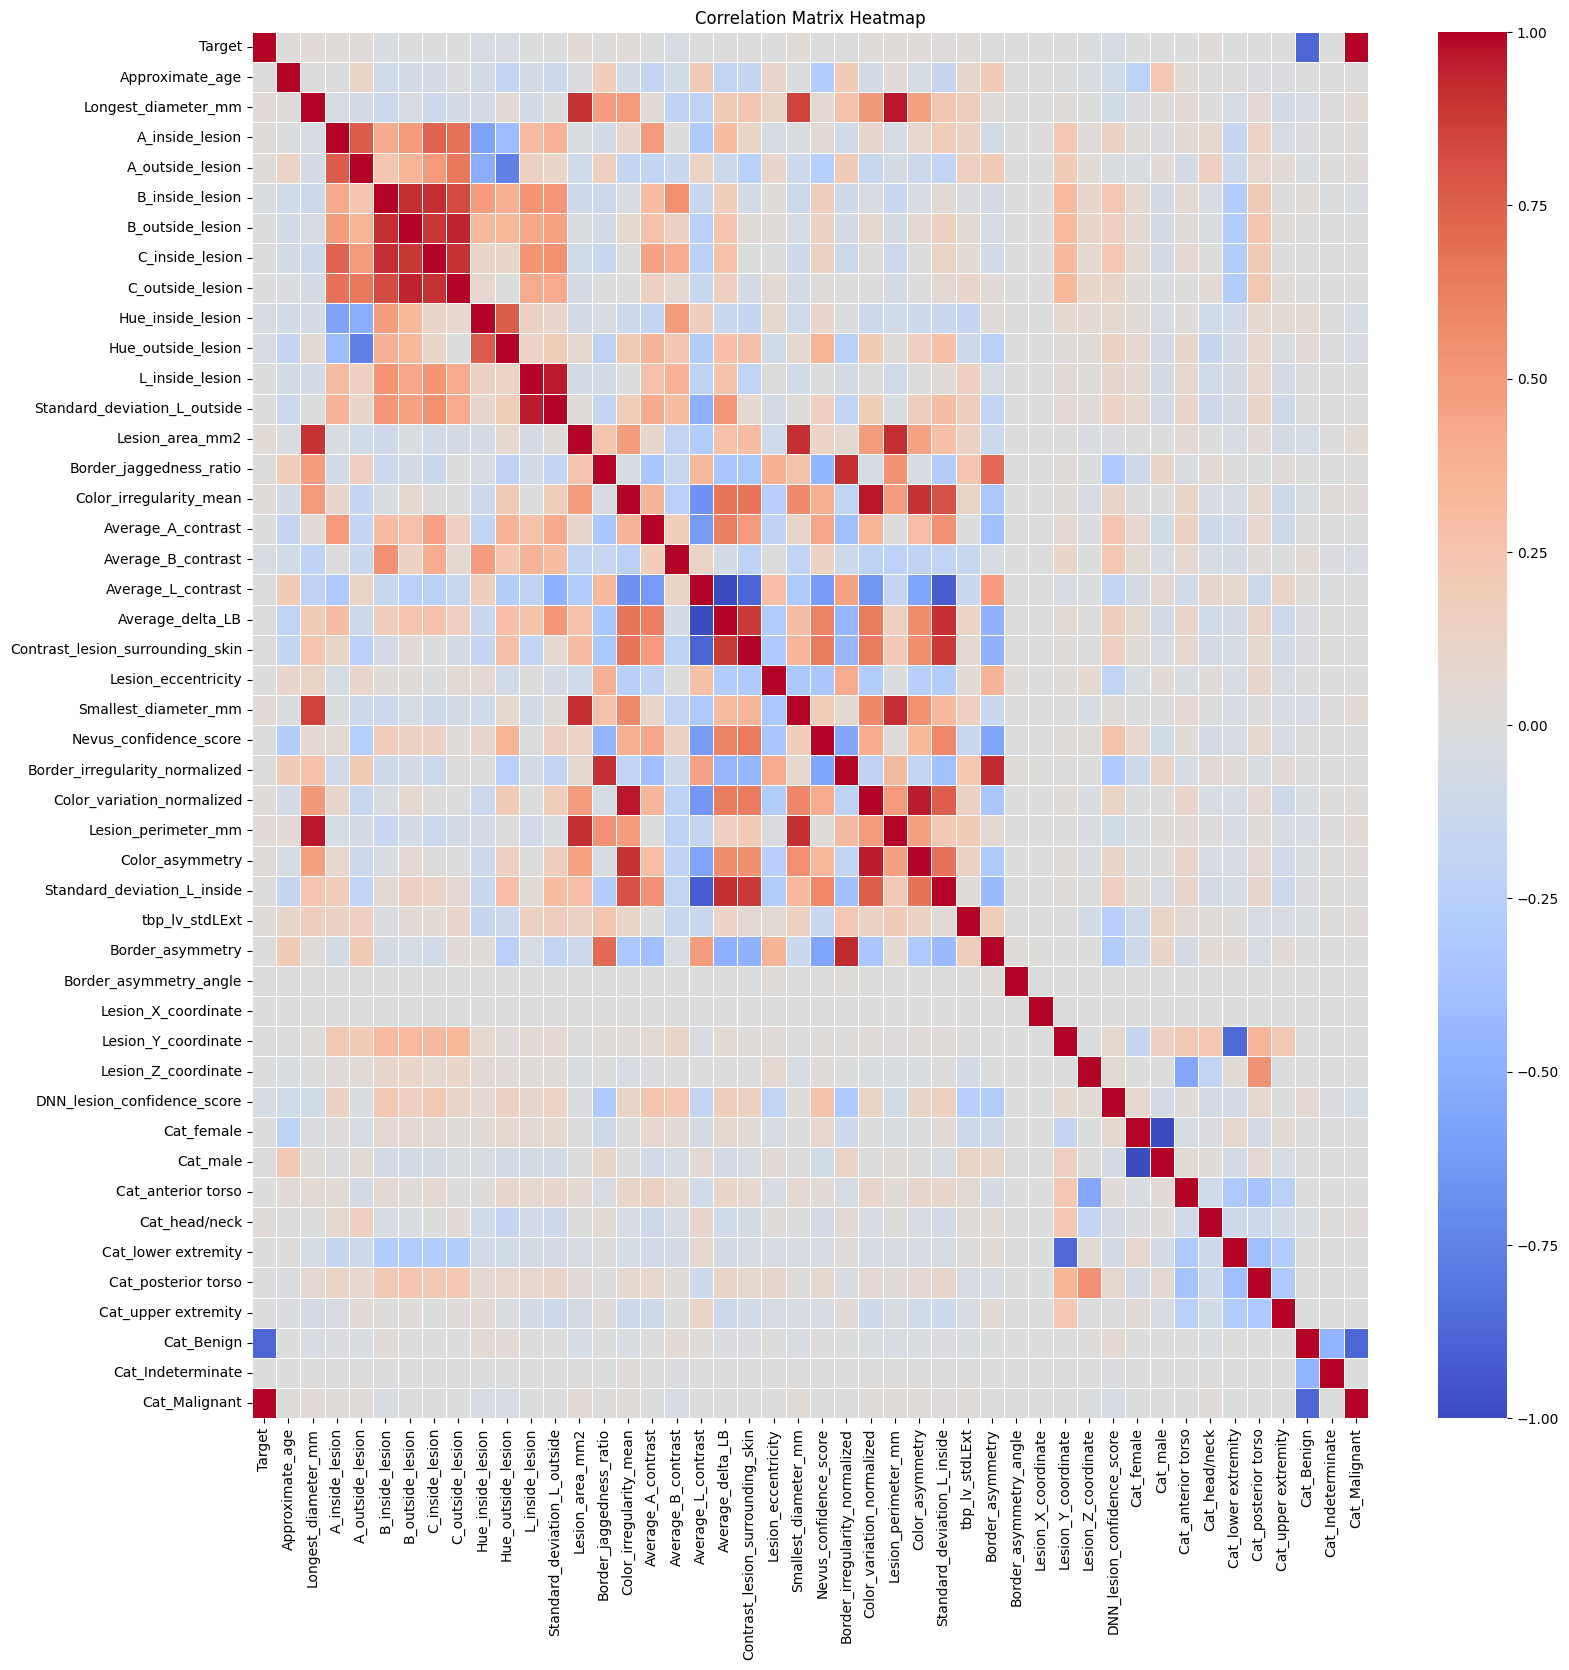

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt



correlation_matrix = df_encoded.corr()

plt.figure(figsize=(18, 18))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Feature Importance with Random Forest

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = df_encoded.drop(columns=['Target'])
y = df_encoded['Target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
#Random forest with 100 nodes of deepness for feature importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

In [12]:
feature_importances

,importance
Cat_Malignant,0.518922
Cat_Benign,0.339940
Cat_Indeterminate,0.030296
Hue_outside_lesion,0.005843
DNN_lesion_confidence_score,0.005807
Contrast_lesion_surrounding_skin,0.004975
Hue_inside_lesion,0.004893
Lesion_area_mm2,0.004468
B_inside_lesion,0.004388
Longest_diameter_mm,0.003552


As expected the most important features are the ones that we identified as most correlated in the heatmap, these been the ones in the first diagnosis column. However we can also see a small impact in other variables that are relevant to the study, such as the color and hue of the detected spot.

We expect a better efficiency at the momment of adding the image to the deep learning model

# Final Code Snippet

In [13]:
'''
#Create dataframe based on th csv file
df_metadata = pd.read_csv('/kaggle/input/isic-2024-challenge/train-metadata.csv')

#Change the names of the columns to ones more significant
new_column_names = {
    'isic_id': 'Unique_case_identifier',
    'target': 'Target',
    'age_approx': 'Approximate_age',
    'sex': 'Patient_sex',
    'anatom_site_general': 'General_anatomical_site',
    'clin_size_long_diam_mm': 'Longest_diameter_mm',
    'image_type': 'Image_type',
    'tbp_tile_type': 'Lighting_modality_3D_TBP',
    'tbp_lv_A': 'A_inside_lesion',
    'tbp_lv_Aext': 'A_outside_lesion',
    'tbp_lv_B': 'B_inside_lesion',
    'tbp_lv_Bext': 'B_outside_lesion',
    'tbp_lv_C': 'C_inside_lesion',
    'tbp_lv_Cext': 'C_outside_lesion',
    'tbp_lv_H': 'Hue_inside_lesion',
    'tbp_lv_Hext': 'Hue_outside_lesion',
    'tbp_lv_L': 'L_inside_lesion',
    'tbp_lv_Lext': 'L_outside_lesion',
    'tbp_lv_areaMM2': 'Lesion_area_mm2',
    'tbp_lv_area_perim_ratio': 'Border_jaggedness_ratio',
    'tbp_lv_color_std_mean': 'Color_irregularity_mean',
    'tbp_lv_deltaA': 'Average_A_contrast',
    'tbp_lv_deltaB': 'Average_B_contrast',
    'tbp_lv_deltaL': 'Average_L_contrast',
    'tbp_lv_deltaLB': 'Average_delta_LB',
    'tbp_lv_deltaLBnorm': 'Contrast_lesion_surrounding_skin',
    'tbp_lv_eccentricity': 'Lesion_eccentricity',
    'tbp_lv_location': 'Anatomical_location',
    'tbp_lv_location_simple': 'Simple_anatomical_location',
    'tbp_lv_minorAxisMM': 'Smallest_diameter_mm',
    'tbp_lv_nevi_confidence': 'Nevus_confidence_score',
    'tbp_lv_norm_border': 'Border_irregularity_normalized',
    'tbp_lv_norm_color': 'Color_variation_normalized',
    'tbp_lv_perimeterMM': 'Lesion_perimeter_mm',
    'tbp_lv_radial_color_std_max': 'Color_asymmetry',
    'tbp_lv_stdL': 'Standard_deviation_L_inside',
    'tbp_lv_Lext': 'Standard_deviation_L_outside',
    'tbp_lv_symm_2axis': 'Border_asymmetry',
    'tbp_lv_symm_2axis_angle': 'Border_asymmetry_angle',
    'tbp_lv_x': 'Lesion_X_coordinate',
    'tbp_lv_y': 'Lesion_Y_coordinate',
    'tbp_lv_z': 'Lesion_Z_coordinate',
    'attribution': 'Image_attribution',
    'license': 'Image_license',
    'lesion_id': 'Unique_lesion_identifier',
    'iddx_full': 'Full_diagnosis_code',
    'iddx_1': 'Primary_diagnosis_category',
    'iddx_2': 'Secondary_diagnosis_category',
    'iddx_3': 'Tertiary_diagnosis_category',
    'iddx_4': 'Quaternary_diagnosis_category',
    'iddx_5': 'Quinary_diagnosis_category',
    'mel_mitotic_index': 'Melanoma_mitotic_index',
    'mel_thick_mm': 'Melanoma_thickness_mm',
    'tbp_lv_dnn_lesion_confidence': 'DNN_lesion_confidence_score'
}

df_metadata.rename(columns=new_column_names, inplace=True)

#Delate columns with no information
df_limp_columns = df_metadata.drop(columns=["Unique_lesion_identifier","Secondary_diagnosis_category","Tertiary_diagnosis_category","Quaternary_diagnosis_category","Quinary_diagnosis_category","Melanoma_mitotic_index","Melanoma_thickness_mm"])

#Deleate useless columns
df_limp = df_limp_columns.drop(columns=["copyright_license","Image_attribution","Image_type", "Lighting_modality_3D_TBP","Anatomical_location","Simple_anatomical_location"])


#Clear registers with null values in the columns that contain less than 10%
columns_to_check = ["Approximate_age","Patient_sex","General_anatomical_site"]
df_clean = df_limp.dropna(subset=columns_to_check)

#We should drop any redundant unique identifier and redundant diagnosis
df_clean = df_clean.drop(columns= ["patient_id","Full_diagnosis_code"])

#Encode each variable
df_encoded = pd.get_dummies(df_clean, columns=['Patient_sex','General_anatomical_site','Primary_diagnosis_category'], prefix='Cat')

df_encoded.info()
'''

'\n#Create dataframe based on th csv file\ndf_metadata = pd.read_csv(\'/kaggle/input/isic-2024-challenge/train-metadata.csv\')\n\n#Change the names of the columns to ones more significant\nnew_column_names = {\n    \'isic_id\': \'Unique_case_identifier\',\n    \'target\': \'Target\',\n    \'age_approx\': \'Approximate_age\',\n    \'sex\': \'Patient_sex\',\n    \'anatom_site_general\': \'General_anatomical_site\',\n    \'clin_size_long_diam_mm\': \'Longest_diameter_mm\',\n    \'image_type\': \'Image_type\',\n    \'tbp_tile_type\': \'Lighting_modality_3D_TBP\',\n    \'tbp_lv_A\': \'A_inside_lesion\',\n    \'tbp_lv_Aext\': \'A_outside_lesion\',\n    \'tbp_lv_B\': \'B_inside_lesion\',\n    \'tbp_lv_Bext\': \'B_outside_lesion\',\n    \'tbp_lv_C\': \'C_inside_lesion\',\n    \'tbp_lv_Cext\': \'C_outside_lesion\',\n    \'tbp_lv_H\': \'Hue_inside_lesion\',\n    \'tbp_lv_Hext\': \'Hue_outside_lesion\',\n    \'tbp_lv_L\': \'L_inside_lesion\',\n    \'tbp_lv_Lext\': \'L_outside_lesion\',\n    \'tbp